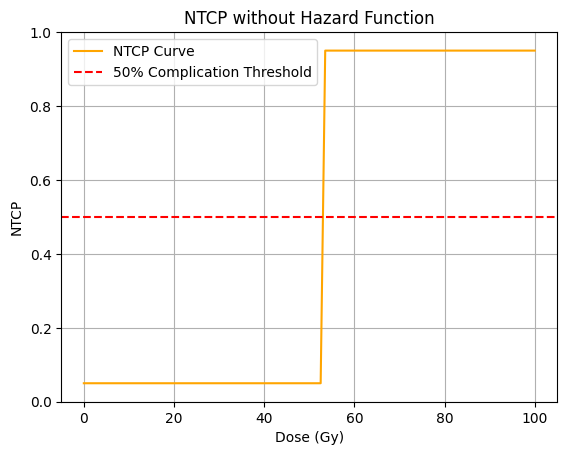

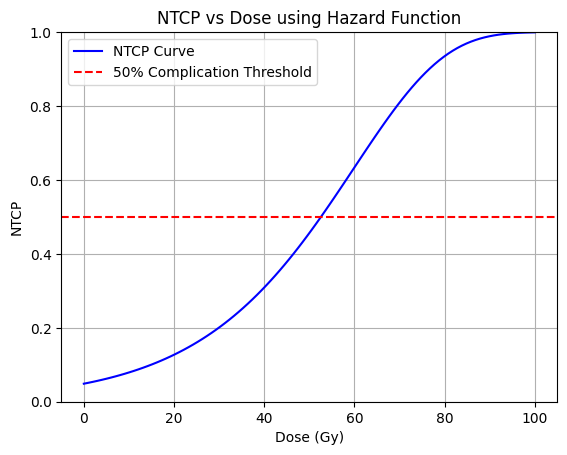

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hazard_function(dose, lambda_param, alpha):
    """
    Calculate the hazard function based on the dose and parameters.

    Parameters:
    dose (float): The radiation dose delivered to the tissue.
    lambda_param (float): The baseline hazard rate.
    alpha (float): The sensitivity of the hazard to the dose.

    Returns:
    float: The calculated hazard value.
    """
    return lambda_param * np.exp(alpha * dose)

def ntcp_hazard(dose, lambda_param, alpha):
    """
    Calculate Normal Tissue Complication Probability (NTCP) using the hazard function.

    Parameters:
    dose (float): The dose delivered to the tissue.
    lambda_param (float): The baseline hazard rate.
    alpha (float): The sensitivity of the hazard to the dose.

    Returns:
    float: The calculated NTCP value.
    """
    haz = hazard_function(dose, lambda_param, alpha)

    # Calculate NTCP from the hazard

    ntcp_value = 1 - np.exp(-haz)

    # Ensure non-zero output by adding a small constant if ntcp_value is zero
    return max(ntcp_value, 1e-6)

def ntcp(dose, lambda_param, alpha):
    """
    Calculate Normal Tissue Complication Probability (NTCP) using the hazard function.

    Parameters:
    dose (float): The dose delivered to the tissue.
    lambda_param (float): The baseline hazard rate.
    alpha (float): The sensitivity of the hazard to the dose.

    Returns:
    float: The calculated NTCP value.
    """
    haz = hazard_function(dose, lambda_param, alpha)

    # Calculate NTCP from the hazard

    if 1 - np.exp(-haz) > 0.5:
      ntcp_value = 0.95
    else:
      ntcp_value = 0.05


    # Ensure non-zero output by adding a small constant if ntcp_value is zero
    return max(ntcp_value, 1e-6)

# Example parameters
lambda_param = 0.05  # Baseline hazard rate
alpha = 0.05        # Sensitivity parameter

# Dose range for testing
doses = np.linspace(0, 100, 100)

# Calculate NTCP for each dose
ntcp_values = [ntcp_hazard(dose, lambda_param, alpha) for dose in doses]
ntcp_values1 = [ntcp(dose, lambda_param, alpha) for dose in doses]

# Plotting the results
plt.plot(doses, ntcp_values1, label='NTCP Curve', color='orange')
plt.title('NTCP without Hazard Function')
plt.xlabel('Dose (Gy)')
plt.ylabel('NTCP')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Complication Threshold')
plt.legend()
plt.grid()
plt.show()

# Plotting the results
plt.plot(doses, ntcp_values, label='NTCP Curve', color='blue')
plt.title('NTCP vs Dose using Hazard Function')
plt.xlabel('Dose (Gy)')
plt.ylabel('NTCP')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Complication Threshold')
plt.legend()
plt.grid()
plt.show()
